In [1]:
import os
import sys
pp_path = os.path.join("..", "pySMOKEPostProcessor")
sys.path.append(pp_path)
from pySMOKEpostprocessor import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Rate Of Production Analysis

As for the Sensitivity Analysis and the Flux Analysis first of all call the constructor of the Post Processor then acces the function to compute the Rate Of Prouction Analysis.

* The constructor (**`pySMOKEpostprocessor`**) of the post processor accept three different arguments:
    > * `kinetic_mechanism` ( *string* ): path to the folder containing the files relative to the kinetic mechanism named directly, after the pre-processing by OpenSMOKE++: **kinetics.xml** and **reaction_names.xml**.
    > * `results_folder` ( *string* ): path to the folder containing the files relative to the output of the simulations that are directly generated by OpenSMOKE++. Depending on the need different files are required. For the computation of the Rate Of Production only the file named **Output.xml** is required.
    > * `verbose` ( *bool* ): whether or not to print some useful information about the computations.
* Function to perform Rate Of Production Analysis (**`RateOfProductionAnalysis`**) accepts several arguments hereinafter reported and varying depending on the type of the analysis that is needed:

    * **Global Rate Of Production Analysis**: the most important reactions are automatically selected on the whole computational domain, by looking at the absolute value of the peak.

        > * `specie` ( *string* ): the name of the specie on which the ROPA is wanted.
        > * `ropa_type` ( *string* ): select the types of ROPA available. Three types settings are available "global", "local" and "region".
        > * `number_of_reactions` ( *int* default: 10 ): number of reactions to be analyzed.
    
    * **Local Rate Of Production Analysis**: the most important reactions are automatically selected by looking at the absolute value of the peak only in the location specified by the user.
    
        > * `local_value` ( *float* ): value to specify, on the computational domain, where to selected the most important reactions.
    
    * **Region Rate Of Production Analysis**: the most important reactions are automatically selected by looking at the absolute value of the peak only in the region specified by the user.
    
        > * `lower_value` ( *float* ): value of the lower bound of the region, of the computational domain, where to selct the most important reactions.
        > * `upper_value` ( *float* ): value of the upper bound of the region, of the computational domain, where to selct the most important reactions.
 
Function Rate Of Production Analysis (**`RateOfProductionAnalysis`**) will return three lists:
- The list containing the coefficient of each selected reaction.
- The list of the indices of each selected reaction inside the mechanism (0-based).
- he list containing the names of the selected reactions (plotting purposes).

## Global Rate Of Production Analysis

In [2]:
kineticFolder = os.path.join("ROPA", "kinetics")
resultsFolder = os.path.join("ROPA", "Output")

PostProcessor = pySMOKEpostproccesor(kinetic_mechanism = kineticFolder, 
                                     results_folder = resultsFolder, 
                                     verbose=True)

ROPA available


In [3]:
specie = "H2"

coefficients, indexes, names = PostProcessor.RateOfProductionAnalysis(specie=specie, 
                                                               ropa_type='global', 
                                                               number_of_reactions=10)
dic = {'ROPA-Coeff': coefficients,'Indices-0based': indexes, 'Reaction Name': names}
df = pd.DataFrame(dic)
df.head()

ROPA successfully executed!


,ROPA-Coeff,Indices-0based,Reaction Name
0,-0.321958,27,R28: H2O+H=H2+OH
1,-0.153918,1,R2: H2+O=H+OH
2,0.007972,10,R11: H+HO2=H2+O2
3,0.005898,7,R8: H2+M=2H+M
4,0.003026,27,R28: H2O+H=H2+OH


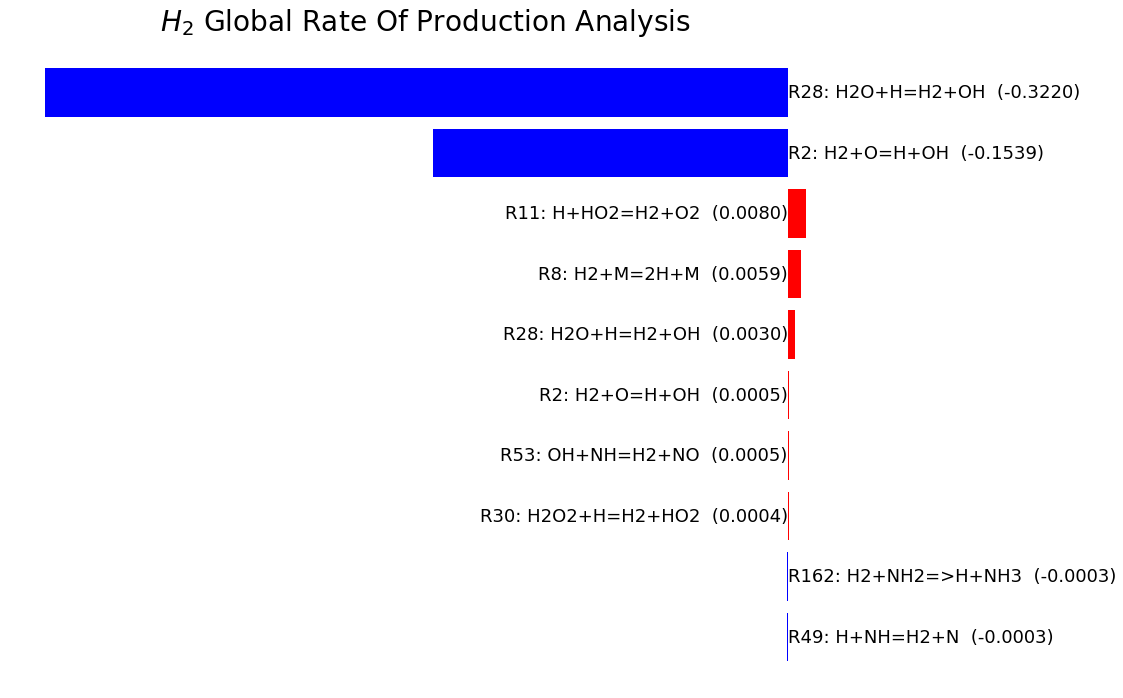

In [4]:
fig = plt.figure(figsize=(15, 12))
ax = plt.subplot()
ax.set_title("$H_{2}$ Global Rate Of Production Analysis", fontsize=28)
bar = ax.barh(df.index, 
              df['ROPA-Coeff'], 
              color = (df['ROPA-Coeff'] >= 0.).map({True:'red', False:'blue'}))

for idx, i in enumerate(bar):
    x = i.get_width()
    y = i.get_y()+0.5*i.get_height()
    if(x<0):
        ax.text(0, y, 
            df['Reaction Name'][idx] + "  (" + str('{:6.4f}'.format(df["ROPA-Coeff"][idx])) + ")", 
            va='center', fontsize=18)
    else:
        ax.text(0,
                y, 
                df['Reaction Name'][idx] + "  (" + str('{:6.4f}'.format(df["ROPA-Coeff"][idx])) + ")", 
                va='center',
                ha='right',
                fontsize=18) 

ax.set_yticks(np.arange(0, 10, 1))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis("off")
ax.invert_yaxis()
plt.show()

## Local Rate Of Production Analysis

In [5]:
specie = "H2"

coefficients, indexes, names = PostProcessor.RateOfProductionAnalysis(specie=specie,
                                                                      ropa_type='local',
                                                                      local_value = 0.001, 
                                                                      number_of_reactions=10)
dic = {'ROPA-Coeff': coefficients,'Indices-0based': indexes, 'Reaction Name': names}
df = pd.DataFrame(dic)
df.head()

ROPA successfully executed!


,ROPA-Coeff,Indices-0based,Reaction Name
0,-0.002187,27,R28: H2O+H=H2+OH
1,-0.000728,1,R2: H2+O=H+OH
2,-0.000607,161,R162: H2+NH2=>H+NH3
3,0.000523,169,R170: H+NH3=>H2+NH2
4,0.000387,10,R11: H+HO2=H2+O2


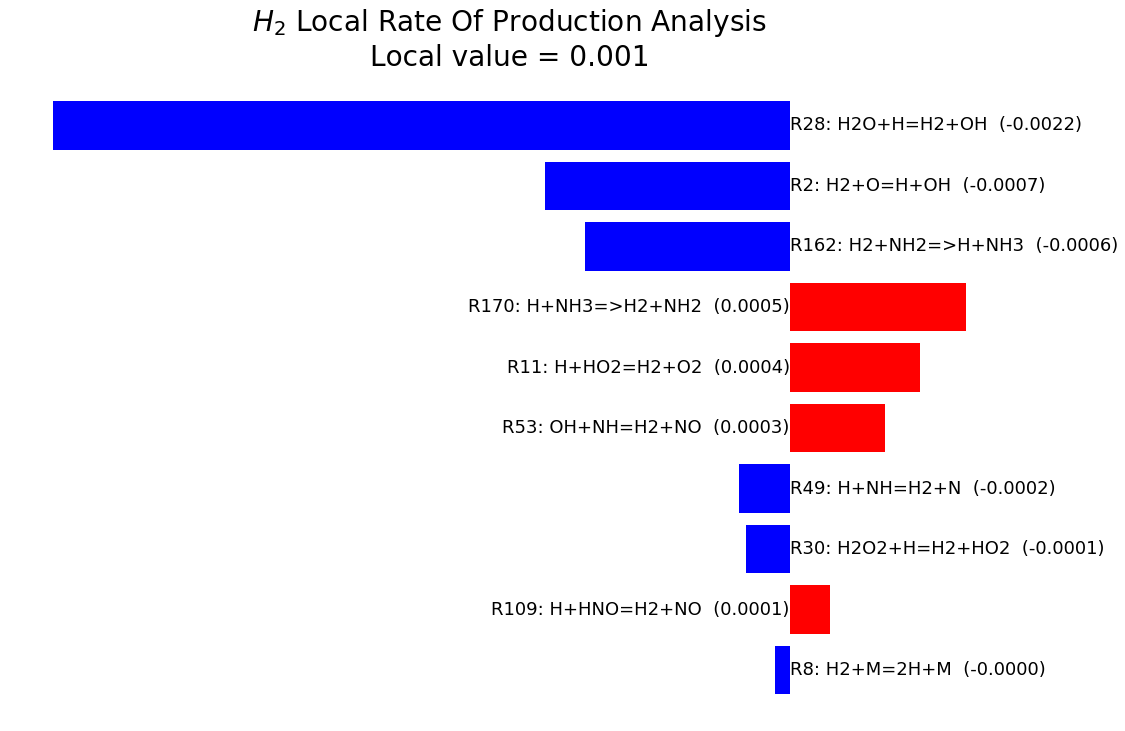

In [6]:
fig = plt.figure(figsize=(18, 12))
ax = plt.subplot()
ax.set_title("$H_{2}$ Local Rate Of Production Analysis\nLocal value = 0.001", fontsize=28)
bar = ax.barh(df.index, df['ROPA-Coeff'], color = (df['ROPA-Coeff'] >=0.).map({True:'red', False:'blue'}))
for idx, i in enumerate(bar):
    x = i.get_width()
    y = i.get_y()+0.5*i.get_height()
    if(x<0):
        ax.text(0, y, 
            df['Reaction Name'][idx] + "  (" + str('{:6.4f}'.format(df["ROPA-Coeff"][idx])) + ")", 
            va='center', fontsize=18)
    else:
        ax.text(0,
                y, 
                df['Reaction Name'][idx] + "  (" + str('{:6.4f}'.format(df["ROPA-Coeff"][idx])) + ")", 
                va='center',
                ha='right',
                fontsize=18)       

ax.set_yticks(np.arange(0, 10, 1))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis("off")
ax.invert_yaxis()
plt.show()

## Region Rate Of Production Analysis

In [7]:
specie = "H2"

coefficients, indexes, names = PostProcessor.RateOfProductionAnalysis(specie=specie,
                                                                      ropa_type='region',
                                                                      lower_value = 0.0005, 
                                                                      upper_value = 0.0009, 
                                                                      number_of_reactions=10)
dic = {'ROPA-Coeff': coefficients,'Indices-0based': indexes, 'Reaction Name': names}
df = pd.DataFrame(dic)
df.head()

ROPA successfully executed!


,ROPA-Coeff,Indices-0based,Reaction Name
0,0.005417,27,R28: H2O+H=H2+OH
1,0.000966,1,R2: H2+O=H+OH
2,0.000859,52,R53: OH+NH=H2+NO
3,-0.000465,48,R49: H+NH=H2+N
4,0.000407,108,R109: H+HNO=H2+NO


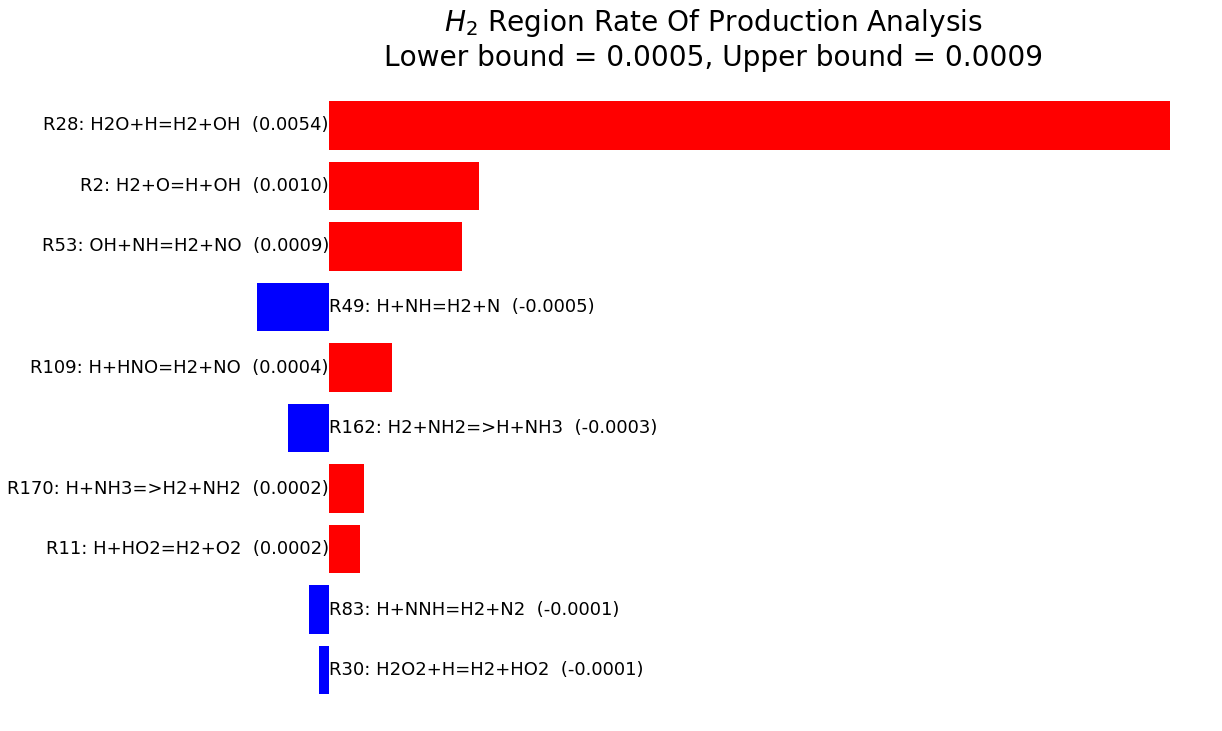

In [8]:
fig = plt.figure(figsize=(18, 12))
ax = plt.subplot()
ax.set_title("$H_{2}$ Region Rate Of Production Analysis\nLower bound = 0.0005, Upper bound = 0.0009", fontsize=28)
bar = ax.barh(df.index, df['ROPA-Coeff'], color = (df['ROPA-Coeff'] >=0.).map({True:'red', False:'blue'}))
for idx, i in enumerate(bar):
    x = i.get_width()
    y = i.get_y()+0.5*i.get_height()
    if(x<0):
        ax.text(0, y, 
            df['Reaction Name'][idx] + "  (" + str('{:6.4f}'.format(df["ROPA-Coeff"][idx])) + ")", 
            va='center', fontsize=18)
    else:
        ax.text(0,
                y, 
                df['Reaction Name'][idx] + "  (" + str('{:6.4f}'.format(df["ROPA-Coeff"][idx])) + ")", 
                va='center',
                ha='right',
                fontsize=18)  

ax.set_yticks(np.arange(0, 10, 1))
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.axis("off")
ax.invert_yaxis()
plt.show()